In [ ]:
import numpy as np
import pickle
import cv2
import os
import datetime as dt
import random
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

ImportError: ignored

In [ ]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input, decode_predictions
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *

In [ ]:
import os
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((299, 299))

# Number of images used to train the model
N_IMAGES = 100

# Path to the dataset folder
root_dir = '../Crop/Dataset'

train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)   
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    plant_disease_folder_list = listdir(train_dir)

    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        plant_disease_image_list = listdir(f"{train_dir}/{plant_disease_folder}/")

        for image in plant_disease_image_list[:N_IMAGES]:
            image_directory = f"{train_dir}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_disease_folder)

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

# Transform the loaded training image data into numpy array
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print()

# Check the number of images loaded for training
image_len = len(image_list)
print(f"Total number of images: {image_len}")

[INFO] Loading images ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Apple___Black_rot ...
[INFO] Processing Apple___Cedar_apple_rust ...
[INFO] Processing Apple___healthy ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Cherry_(including_sour)___healthy ...
[INFO] Processing Cherry_(including_sour)___Powdery_mildew ...
[INFO] Processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot ...
[INFO] Processing Corn_(maize)___Common_rust_ ...
[INFO] Processing Corn_(maize)___healthy ...
[INFO] Processing Corn_(maize)___Northern_Leaf_Blight ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Grape___Esca_(Black_Measles) ...
[INFO] Processing Grape___healthy ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening) ...
[INFO] Processing Peach___Bacterial_spot ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Pepper,_bell___Bacterial_spot ...
[INFO] Processing Pepper,_bel

C:\Users\ATHIRANIRMAL\Desktop\PROJECT\output\train/Apple___Black_rot/0d17b92b-8ec2-4a00-a8ff-9daea3fed2e8___JR_FrgE.S 2915.JPG


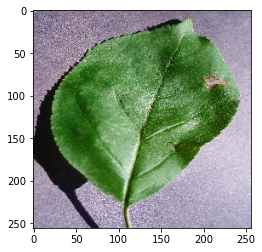

In [ ]:
# Example datapoint: Displaying a leaf image from 'Rot' class
ex_path = train_dir+'/Apple___Black_rot/0d17b92b-8ec2-4a00-a8ff-9daea3fed2e8___JR_FrgE.S 2915.JPG'
print(ex_path)
img_ex = cv2.imread(ex_path)

img_rgb = cv2.cvtColor(img_ex, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

pickle.dump(label_binarizer,open('plant_disease_label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print("Total number of classes: ", n_classes)
print(label_binarizer.classes_)

Total number of classes:  38
['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato_

In [ ]:
datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        brightness_range=[0.9,1.1],
        horizontal_flip=True,
        validation_split=0.2,
        preprocessing_function=preprocess_input
)

In [ ]:
print("[INFO] Splitting data to train and test...")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Splitting data to train and test...


In [ ]:
epochs = 35
batch_size = 16
testsplit = .2
#targetx = 224
#targety = 224
targetx = 299
targety = 299
learning_rate = 0.0001
classes = 38
seed = random.randint(1, 1000)

In [ ]:
checkpoint = ModelCheckpoint('crop_disease_classifier.h5',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1,
                             mode='auto',
                             save_weights_only=False,
                             period=1)

tensorboard = TensorBoard(log_dir="./logs-"+dt.datetime.now().strftime("%m%d%Y%H%M%S"),
                            histogram_freq=0,
                            batch_size=batch_size,
                            write_graph=False,
                            update_freq='epoch')

def epoch_end(epoch, logs):
    message = "End of epoch "+str(epoch)+". Learning rate: "+str(K.eval(model.optimizer.lr))
    os.system('echo '+message)

def epoch_begin(epoch, logs):
    print("Learning rate: ", K.eval(model.optimizer.lr))
    
def train_begin(logs):
    os.system("echo Beginning training")

earlystop = EarlyStopping(monitor='val_accuracy',
                          min_delta=.0001,
                          patience=20,
                          verbose=1,
                          mode='auto',
                          baseline=None,
                          restore_best_weights=True)

reducelr = ReduceLROnPlateau(monitor='val_accuracy',
                             factor=np.sqrt(.1),
                             patience=5,
                             verbose=1,
                             mode='auto',
                             min_delta=.0001,
                             cooldown=0,
                             min_lr=0.0000001)

lambdacb = LambdaCallback(on_epoch_begin=epoch_begin,
                          on_epoch_end=epoch_end,
                          on_batch_begin=None,
                          on_batch_end=None,
                          on_train_begin=train_begin,
                          on_train_end=None)

In [ ]:
base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(299, 299, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(1280, activation='relu',  kernel_initializer=glorot_uniform(seed), bias_initializer='zeros')(x)
x = BatchNormalization()(x)
predictions = Dense(38, activation='softmax', kernel_initializer='random_uniform', bias_initializer='zeros')(x)

model = Model(inputs=base_model.input, outputs=predictions)
optimizer = Adam(lr=learning_rate)
loss = "categorical_crossentropy"

for layer in model.layers:
    layer.trainable = True

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=["accuracy"])

model.summary()
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

__________________________________________________________________________________________________
conv2d_137 (Conv2D)             (None, 17, 17, 128)  139264      block17_15_ac[0][0]              
__________________________________________________________________________________________________
batch_normalization_137 (BatchN (None, 17, 17, 128)  384         conv2d_137[0][0]                 
__________________________________________________________________________________________________
activation_137 (Activation)     (None, 17, 17, 128)  0           batch_normalization_137[0][0]    
__________________________________________________________________________________________________
conv2d_138 (Conv2D)             (None, 17, 17, 160)  143360      activation_137[0][0]             
__________________________________________________________________________________________________
batch_normalization_138 (BatchN (None, 17, 17, 160)  480         conv2d_138[0][0]                 
__________

Total params: 56,364,038
Trainable params: 56,297,862
Non-trainable params: 66,176
__________________________________________________________________________________________________
0 input_1 True
1 conv2d True
2 batch_normalization True
3 activation True
4 conv2d_1 True
5 batch_normalization_1 True
6 activation_1 True
7 conv2d_2 True
8 batch_normalization_2 True
9 activation_2 True
10 max_pooling2d True
11 conv2d_3 True
12 batch_normalization_3 True
13 activation_3 True
14 conv2d_4 True
15 batch_normalization_4 True
16 activation_4 True
17 max_pooling2d_1 True
18 conv2d_8 True
19 batch_normalization_8 True
20 activation_8 True
21 conv2d_6 True
22 conv2d_9 True
23 batch_normalization_6 True
24 batch_normalization_9 True
25 activation_6 True
26 activation_9 True
27 average_pooling2d True
28 conv2d_5 True
29 conv2d_7 True
30 conv2d_10 True
31 conv2d_11 True
32 batch_normalization_5 True
33 batch_normalization_7 True
34 batch_normalization_10 True
35 batch_normalization_11 True
36 activat

391 batch_normalization_106 True
392 activation_106 True
393 conv2d_104 True
394 conv2d_107 True
395 batch_normalization_104 True
396 batch_normalization_107 True
397 activation_104 True
398 activation_107 True
399 block17_8_mixed True
400 block17_8_conv True
401 block17_8 True
402 block17_8_ac True
403 conv2d_109 True
404 batch_normalization_109 True
405 activation_109 True
406 conv2d_110 True
407 batch_normalization_110 True
408 activation_110 True
409 conv2d_108 True
410 conv2d_111 True
411 batch_normalization_108 True
412 batch_normalization_111 True
413 activation_108 True
414 activation_111 True
415 block17_9_mixed True
416 block17_9_conv True
417 block17_9 True
418 block17_9_ac True
419 conv2d_113 True
420 batch_normalization_113 True
421 activation_113 True
422 conv2d_114 True
423 batch_normalization_114 True
424 activation_114 True
425 conv2d_112 True
426 conv2d_115 True
427 batch_normalization_112 True
428 batch_normalization_115 True
429 activation_112 True
430 activation_11

In [ ]:
# Train model
print("[INFO] Training network...")
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              validation_data=(x_test, y_test),
                              steps_per_epoch=len(x_train) // batch_size,
                              epochs=35, 
                              verbose=1,callbacks=[reducelr, earlystop, lambdacb, tensorboard, checkpoint])

[INFO] Training network...


C:\Users\ATHIRANIRMAL\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
Learning rate:  1e-04
190/190 [==============================] - 5867s 31s/step - loss: 1.7130 - accuracy: 0.5607 - val_loss: 1.0486 - val_accuracy: 0.8158

Epoch 00001: val_accuracy improved from -inf to 0.81579, saving model to crop_disease_classifier.h5
Epoch 2/35
Learning rate:  1e-04
190/190 [==============================] - 5469s 29s/step - loss: 0.1576 - accuracy: 0.9575 - val_loss: 2.0284 - val_accuracy: 0.7000

Epoch 00002: val_accuracy did not improve from 0.81579
Epoch 3/35
Learning rate:  1e-04
190/190 [==============================] - 6680s 35s/step - loss: 0.0701 - accuracy: 0.9786 - val_loss: 3.4351 - val_accuracy: 0.7276

Epoch 00003: val_accuracy did not improve from 0.81579
Epoch 4/35
Learning rate:  1e-04
190/190 [==============================] - 5816s 31s/step - loss: 0.0409 - accuracy: 0.9860 - val_loss: 4.0473 - val_accuracy: 0.7105

Epoch 00004: val_accuracy did not improve from 0.81579
Epoch 5/35
Learning rate:  1e-04
190/190 [=====================

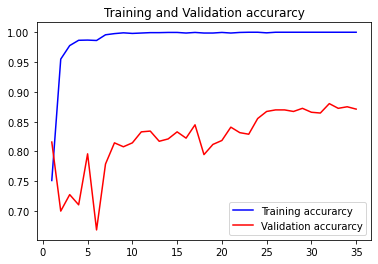

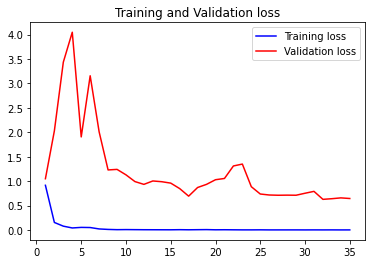

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
24/24 [==============================] - 226s 9s/step - loss: 0.6439 - accuracy: 0.8711
Test Accuracy: 87.1052622795105


In [ ]:
def predict_disease(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float16) / 225.0
    np_image = np.expand_dims(np_image,0)
    plt.imshow(plt.imread(image_path))
    result = model.predict(np_image)
    result = result.argmax(1)
    print((label_binarizer.classes_[result][0]))

In [ ]:
predict_disease('../Dataset/train/Cherry_(including_sour)___Powdery_mildew/.jpg')